# Prevendo o Nível de Satisfação dos Clientes do Santander
## Leonara Alves

#### Objetivo: Acurácia de pelo menos 70%. 

In [2]:
# Leitura de Pacotes
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn import model_selection
from sklearn.metrics import classification_report
from pandas.tools.plotting import scatter_matrix
from sklearn.decomposition import PCA               # PCA
from sklearn.preprocessing import MinMaxScaler      # escala
from sklearn.preprocessing import StandardScaler    # padronização
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier   
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

In [29]:
# Lendo a base de dados
dataset_train = pd.read_csv("train.csv", index_col = 'ID')
dataset_test = pd.read_csv("test.csv", index_col = 'ID')

### Visualização dos Dados

In [4]:
# Visualização dos dados
dataset_train.head(10)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
13,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
14,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
18,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,0
20,2,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0


In [30]:
# Remove colunas constantes (std = 0)
remove = []
for col in dataset_train.columns:
    if dataset_train[col].std() == 0:
        remove.append(col)

dataset_train.drop(remove, axis = 1, inplace = True)
dataset_test.drop(remove, axis = 1, inplace = True)

In [31]:
# Remove colunas duplicadas
remove = []
cols = dataset_train.columns
for i in range(len(cols)-1):
    v = dataset_train[cols[i]].values
    for j in range(i+1,len(cols)):
        if np.array_equal(v,dataset_train[cols[j]].values):
            remove.append(cols[j])

dataset_train.drop(remove, axis = 1, inplace = True)
dataset_test.drop(remove, axis = 1, inplace = True)

In [32]:
# Distribuição das classes
dataset_train.groupby('TARGET').size()

TARGET
0    73012
1     3008
dtype: int64

In [8]:
# Descrição dos dados
dataset_train.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [9]:
# Tipos de Dados
print(dataset_train.dtypes)

var3                               int64
var15                              int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var5_0                         int64
ind_var5                           int64
ind_var6_0                         int64
ind_var6        

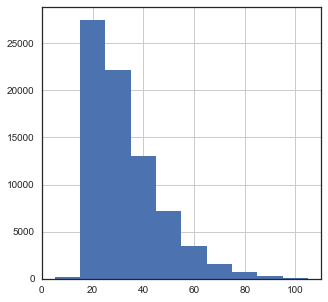

In [26]:
# Histograma
dataset_train['var15'].hist(figsize = (5, 5))
plt.show()

### Preparação dos Dados

In [33]:
# Balanceamento das observações
array = dataset_train.values
array_test = dataset_test.values

# Separando o array em componentes de input e output
X = array[:,0:306]
Y = array[:,306]
Y = Y.astype('int')

sm = SMOTE(random_state = 7)
X, Y = sm.fit_resample(X, Y)
print('Resampled dataset shape %s' % Counter(Y))

Resampled dataset shape Counter({0: 73012, 1: 73012})


In [34]:
# Normalizando os dados (comprimento igual a 1)

# Gerando os dados normalizados 
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

normalizedX_test = scaler.transform(array_test)

In [35]:
# Transformando os dados para a mesma escala (entre 0 e 1)

# Gerando a nova escala
scaler = MinMaxScaler(feature_range = (0, 1)).fit(normalizedX)
rescaledX = scaler.transform(normalizedX)

rescaledX_test = scaler.transform(normalizedX_test)

In [36]:
# Adicionando os dados normalizados para o dataset original

# Dados de treino
dataset_train_normalizes = pd.DataFrame(rescaledX)
dataset_train_normalizes['target'] = Y.astype(int)

dataset_train_normalizes.head(10)

,0,1,2,3,4,5,6,7,8,9,...,297,298,299,300,301,302,303,304,305,target
0,0.993766,0.103919,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999997,0
1,0.993755,0.122203,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999872,0
2,0.993745,0.060507,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999999,0
3,0.993746,0.102391,0.0,0.019691,0.011047,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999962,0
4,0.993720,0.015675,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266178,0
5,0.993738,0.046310,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999999,0
6,0.993736,0.050367,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0
7,0.993723,0.018302,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0
8,0.993735,0.078178,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999999,0
9,0.993721,0.012423,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0


### Feature Extraction

In [13]:
# Feature Extraction (PCA)

# Seleção de atributos
pca = PCA(n_components = 50)
fit = pca.fit(rescaledX)

# Sumarizando os componentes
print("Variância: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Variância: [0.27648054 0.16092403 0.10693316 0.06811674 0.04206278 0.03986507
 0.03144544 0.02734543 0.02245962 0.01835544 0.01604332 0.01373494
 0.00978715 0.00923835 0.00882188 0.0080708  0.0071514  0.00684056
 0.00599474 0.00572849 0.00534209 0.00497739 0.00462632 0.00460363
 0.004404   0.00414159 0.00371402 0.00360835 0.00349448 0.0031996
 0.00303213 0.00291644 0.00279466 0.00269597 0.00254671 0.00239041
 0.00226385 0.00215642 0.00181666 0.0017763  0.00168313 0.00153836
 0.00149203 0.00144734 0.0014325  0.00139323 0.00135765 0.00131714
 0.00125887 0.00120831]
[[-5.85047045e-03 -5.40996513e-02  1.21398261e-03 ...  4.30889072e-04
   3.95936302e-04 -5.05436831e-01]
 [-1.88887138e-03 -9.38256239e-03  2.67011073e-03 ...  6.98777627e-05
   5.46349939e-05 -9.09165018e-02]
 [ 6.55328729e-03  1.78191914e-01  1.27890278e-02 ... -1.08530008e-04
  -9.79872213e-05  1.19697435e-02]
 ...
 [ 1.35089025e-02 -1.67291872e-01 -7.16354812e-02 ...  1.25165715e-03
   8.11946061e-04 -1.22403478e-02]
 [ 2.

### Seleção do Modelo Preditivo

In [14]:
# Aplicando o PCA aos datasets
pca = PCA(n_components = 50).fit(rescaledX)
newdf_train = pca.transform(rescaledX)
newdf_test = pca.transform(rescaledX_test) 

# Gerando novos datasets
features_train = pd.DataFrame(newdf_train)
features_test = pd.DataFrame(newdf_test)

In [20]:
# *************** Esta célula leva alguns minutos para ser executada **********

# Metodos Bagging - RandomForest e Extra Trees

ensembles = []
ensembles.append(('RF', RandomForestClassifier(n_estimators = 35)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators = 35)))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in ensembles:
    kfold = model_selection.KFold(n_splits = 10, random_state = 7)
    cross_val_result = model_selection.cross_val_score(modelo, 
                                                        features_train, 
                                                        Y, 
                                                        cv = kfold, 
                                                        scoring = 'accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)
    
# Melhor Modelo: ExtraTreesClassifier

RF: 0.925471 (0.008745)
ET: 0.932956 (0.008522)


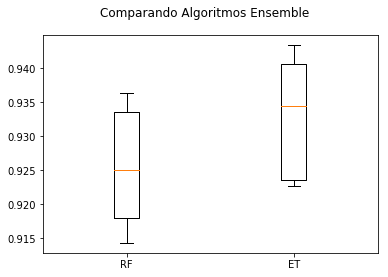

In [21]:
# Comparando os modelos criados
fig = plt.figure()
fig.suptitle('Comparando Algoritmos Ensemble')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

## Previsão

In [15]:
# Preparando a versão final do modelo
modelo = ExtraTreesClassifier(n_estimators = 35)
modelo.fit(features_train, Y)
previsoes = modelo.predict_proba(features_test)

In [17]:
dataset_test_submission = pd.read_csv("test.csv", index_col = 'ID')
dataset_test_submission['TARGET'] = previsoes[:,1]
Submission = dataset_test_submission['TARGET']
Submission = pd.DataFrame(Submission);Submission.head(10)

,TARGET
ID,
2,0.342857
5,0.114286
6,0.000000
7,0.000000
9,0.000000
11,0.485714
12,0.228571
15,0.485714
16,0.057143


In [18]:
Submission.mean()

TARGET    0.13734
dtype: float64

### Salvando os resultados

In [19]:
Submission.to_csv('Submission.csv', header = True)